## XGBoost 

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
# Fetch the dataset from sklearn available 
from sklearn.datasets import load_breast_cancer

In [9]:
#load into jn
bcdata=load_breast_cancer()

In [10]:
#define your independent and dependent variable 
bc=pd.DataFrame(bcdata['data'],index=None)
bcflag=bcdata['target']  #target

In [12]:
#dataset preview
bc.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
#check dataset meta -field type
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

<AxesSubplot:>

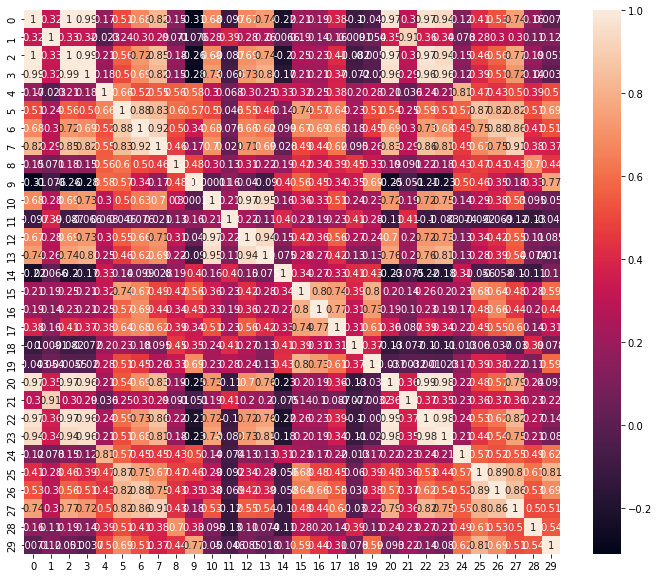

In [14]:
#Plot the correlation between features.
# Due to number of features is high-30, you may pick the best using PCA,etc
plt.figure(figsize=(12,10),)
sns.heatmap(bc.corr(),annot=True)

In [15]:
# split the dataset into train, test
from sklearn.model_selection import train_test_split
seed=1
X_train,X_test,y_train,y_test=train_test_split(bc,bcflag,test_size=0.20,random_state=seed)

In [16]:
#import models
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
import time

In [17]:
#compare model performance and accuracy
models=[]
models.append(('Logistic Regression',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('SVC',SVC()))
models.append(('XGBOOST',XGBClassifier(eta=0.5,gamma=0.5) ))

results=[]
names=[]
scoring='accuracy'

start_time=time.perf_counter()#time.process_time_ns()

for name,model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    
    predictions=[ round(x) for x in y_pred ]
    
    accuracy= accuracy_score(y_test,predictions)
    
    end_time=time.perf_counter() #time.process_time_ns()
    
    print(f" {name}: {accuracy:.2f}, Time: {( end_time - start_time):.2f} ")

 Logistic Regression: 0.95, Time: 0.07 
 KNN: 0.94, Time: 0.08 
 SVC: 0.90, Time: 0.10 
 XGBOOST: 0.96, Time: 0.22 


/Users/sarojbehera/Desktop/Personal_projects/ML_Projects/mlp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
